In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DigiPythonTools import DataUtility


In [18]:
min_sql = DataUtility()
# query = 'SELECT MIN(TagDateTime) AS mintime, MAX(TagDateTime) AS maxtime  FROM DigiProcessInfo.tblLpFmRtFceTrendData '
query_march = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2024-03-%';
"""

query_december = """SELECT *
FROM DigiProcessInfo.tblLpFmRtFceTrendData
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-12-%';
"""
march_df = min_sql.min_query(query_march)
december_df = min_sql.min_query(query_december)

	opening conn from file
	conn opened


C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


In [19]:
print(march_df)
print(december_df)
plt.draw()

                         TagName         TagDateTime  TagValue
0       RTFCE1_Zone1AirValveGain 2024-03-15 07:30:00      0.75
1       RTFCE1_Zone1AirValveGain 2024-03-15 07:35:00      0.75
2       RTFCE1_Zone1AirValveGain 2024-03-15 07:40:00      0.75
3       RTFCE1_Zone1AirValveGain 2024-03-15 07:45:00      0.75
4       RTFCE1_Zone1AirValveGain 2024-03-15 07:50:00      0.75
...                          ...                 ...       ...
122820       RTFCE1_Zone1TempInt 2024-03-19 14:50:00      1.00
122821       RTFCE1_Zone1TempInt 2024-03-19 14:55:00      1.00
122822       RTFCE1_Zone1TempInt 2024-03-19 15:00:00      1.00
122823       RTFCE1_Zone1TempInt 2024-03-19 15:05:00      1.00
122824       RTFCE1_Zone1TempInt 2024-03-19 15:10:00      1.00

[122825 rows x 3 columns]
                   TagName         TagDateTime     TagValue
0      RTFCE1_Zone1AirFlow 2023-12-10 05:00:00   117.346142
1      RTFCE1_Zone1AirFlow 2023-12-10 05:05:00   117.535051
2      RTFCE1_Zone1AirFlow 2023-12-10

AttributeError: Rectangle.set() got an unexpected keyword argument 'marker'

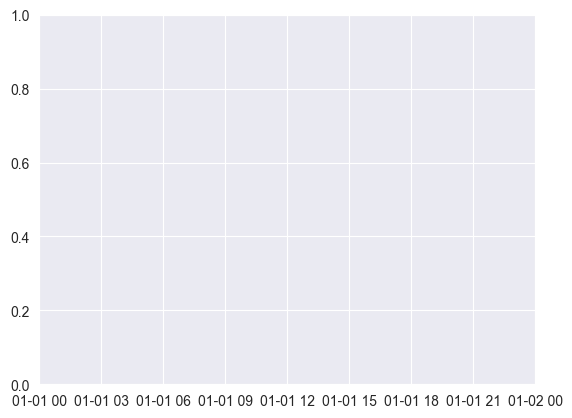

In [21]:
plt.bar(march_df['TagDateTime'], march_df['TagValue'], marker='o', label='Tag Values')

C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


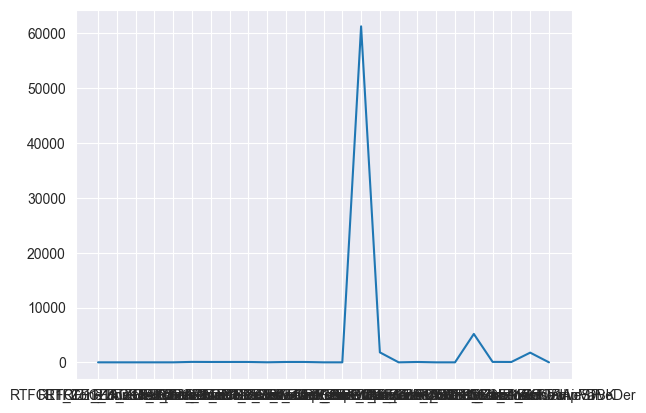

In [23]:
df1 = """SELECT DISTINCT TagName,  AVG(TagValue) AS average_value FROM  DigiProcessInfo.tblLpFmRtFceTrendData 
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2023-12-%' GROUP BY TagName"""

df1 = min_sql.min_query(df1)

plt.plot(df1['TagName'], df1['average_value'], label='Date vs Average Value')

C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


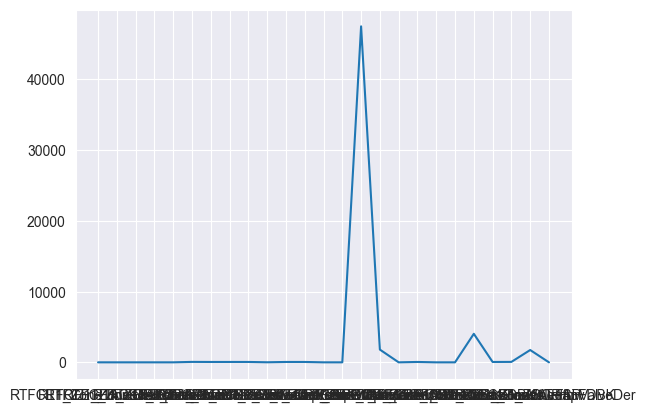

In [41]:
df2 = """SELECT DISTINCT TagName,  AVG(TagValue) AS average_value FROM  DigiProcessInfo.tblLpFmRtFceTrendData 
WHERE CONVERT(VARCHAR(10), TagDateTime, 120) LIKE '2024-03-%' GROUP BY TagName"""

df2 = min_sql.min_query(df2)

plt.plot(df2['TagName'], df2['average_value'], label='Date vs Average Value')

In [28]:
march_df = min_sql.min_query(query_march)
december_df = min_sql.min_query(query_december)



C:\Users\sk5261\PycharmProjects\pythonProject4\.venv\lib\site-packages\DigiPythonTools\MinimumSQLUtility.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res_df = pd.read_sql_query(sql_str, self.conn)


In [29]:
print(march_df.isnull().sum())
print(december_df.isnull().sum())


TagName        0
TagDateTime    0
TagValue       0
dtype: int64
TagName        0
TagDateTime    0
TagValue       0
dtype: int64


In [30]:
# Convert to datetime
march_df['TagDateTime'] = pd.to_datetime(march_df['TagDateTime'])
december_df['TagDateTime'] = pd.to_datetime(december_df['TagDateTime'])


In [33]:
# Resample data to daily frequency
march_df.set_index('TagDateTime', inplace=True)
december_df.set_index('TagDateTime', inplace=True)

march_daily = march_df.resample('D').mean(numeric_only=True)
december_daily = december_df.resample('D').mean(numeric_only=True)



KeyError: "None of ['TagDateTime'] are in the columns"

In [34]:
print(march_df.head())

                                      TagName  TagValue
TagDateTime                                            
2024-03-15 07:30:00  RTFCE1_Zone1AirValveGain      0.75
2024-03-15 07:35:00  RTFCE1_Zone1AirValveGain      0.75
2024-03-15 07:40:00  RTFCE1_Zone1AirValveGain      0.75
2024-03-15 07:45:00  RTFCE1_Zone1AirValveGain      0.75
2024-03-15 07:50:00  RTFCE1_Zone1AirValveGain      0.75


In [35]:
print(december_df.head())

                                 TagName    TagValue
TagDateTime                                         
2023-12-10 05:00:00  RTFCE1_Zone1AirFlow  117.346142
2023-12-10 05:05:00  RTFCE1_Zone1AirFlow  117.535051
2023-12-10 05:10:00  RTFCE1_Zone1AirFlow  117.514164
2023-12-10 05:15:00  RTFCE1_Zone1AirFlow  117.522846
2023-12-10 05:20:00  RTFCE1_Zone1AirFlow  117.971049


In [40]:
print(march_df['TagValue'])

TagDateTime
2024-03-15 07:30:00    0.75
2024-03-15 07:35:00    0.75
2024-03-15 07:40:00    0.75
2024-03-15 07:45:00    0.75
2024-03-15 07:50:00    0.75
                       ... 
2024-03-19 14:50:00    1.00
2024-03-19 14:55:00    1.00
2024-03-19 15:00:00    1.00
2024-03-19 15:05:00    1.00
2024-03-19 15:10:00    1.00
Name: TagValue, Length: 122825, dtype: float64
